In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geoplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
%matplotlib inline

import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *

import plotly.graph_objects as go
from nltk.corpus import stopwords

import geopandas as gpd
import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('US_Accidents_March23.csv')
df.head(10)

ID   Source  Severity           Start_Time             End_Time  \
0   A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1   A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2   A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3   A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4   A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
5   A-6  Source2         3  2016-02-08 07:44:26  2016-02-08 08:14:26   
6   A-7  Source2         2  2016-02-08 07:59:35  2016-02-08 08:29:35   
7   A-8  Source2         3  2016-02-08 07:59:58  2016-02-08 08:29:58   
8   A-9  Source2         2  2016-02-08 08:00:40  2016-02-08 08:30:40   
9  A-10  Source2         3  2016-02-08 08:10:04  2016-02-08 08:40:04   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   
5  40.100590 -82.925194      NaN      NaN          0.01  ...      False   
6  39.758274 -84.230507      NaN      NaN          0.00  ...      False   
7  39.770382 -84.194901      NaN      NaN          0.01  ...      False   
8  39.778061 -84.172005      NaN      NaN          0.00  ...      False   
9  40.100590 -82.925194      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   
5   False  False           False          False        False            Day   
6   False  False           False          False        False            Day   
7   False  False           False          False        False            Day   
8   False  False           False          False        False            Day   
9   False  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  
5            Day               Day                   Day  
6            Day               Day                   Day  
7            Day               Day                   Day  
8            Day               Day                   Day  
9            Day               Day                   Day  

[10 rows x 46 columns]

In [3]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
print("no of columns: ",len(df.columns))
print("no of rows: ",len(df))

no of columns:  46
no of rows:  7728394


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

In [7]:
len(df.select_dtypes(['int64','float64']).columns)

13

In [8]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [9]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
 df.isna().sum().sort_values(ascending=False)*100 / len(df)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [11]:
missing_data=df.isna().sum().sort_values(ascending=False)*100 / len(df)

In [12]:
type(missing_data)

pandas.core.series.Series

In [ ]:
#missing_data=plot(kind='bar')

In [ ]:
#missing_data[missing_data!=0].plot(kind='barh')

In [15]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [17]:
cities=df.City.unique()
len(cities)

13679

In [18]:
cities_accident=df.City.value_counts()
cities_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [19]:
'New York' in cities

True

In [20]:
cities_accident["New York"]

21699

<Axes: ylabel='City'>

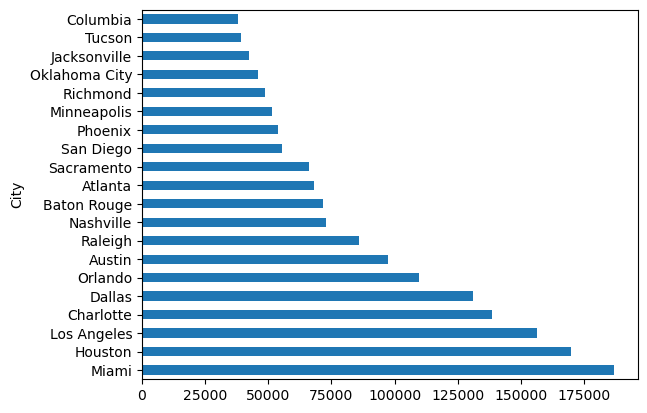

In [21]:
cities_accident[:20].plot(kind='barh')

In [22]:
sns.set_style("darkgrid")

<Axes: xlabel='count', ylabel='Density'>

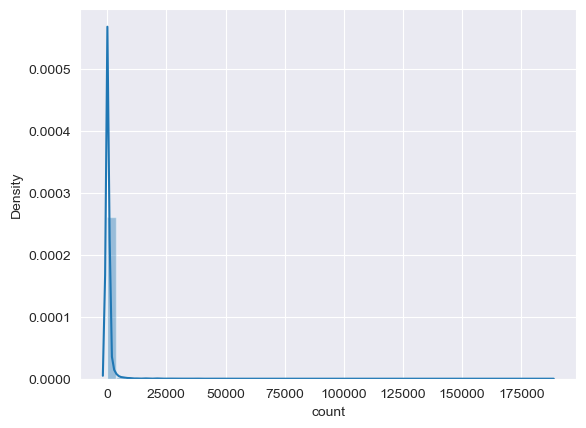

In [23]:
sns.distplot(cities_accident)

In [24]:
high_acc_cities=cities_accident[cities_accident>=1000]
low_acc_cities=cities_accident[cities_accident<1000]

In [25]:
len(high_acc_cities)

1218

<Axes: xlabel='count', ylabel='Density'>

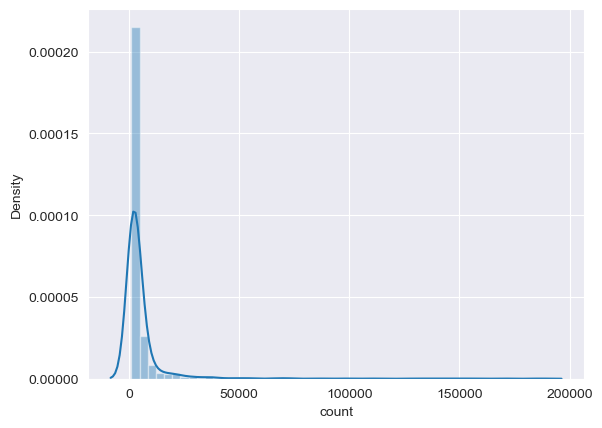

In [26]:
sns.distplot(high_acc_cities)

<Axes: xlabel='count', ylabel='Density'>

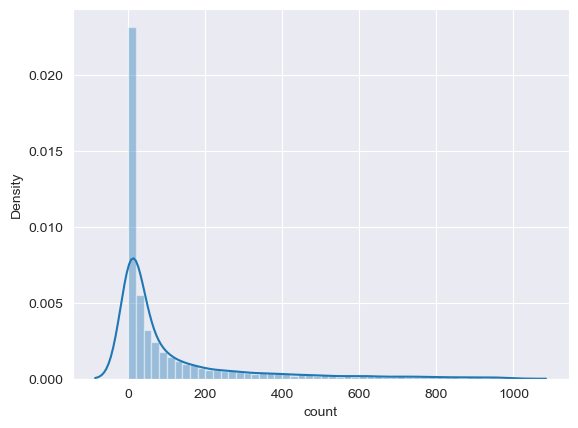

In [27]:
sns.distplot(low_acc_cities)

<Axes: xlabel='count', ylabel='Count'>

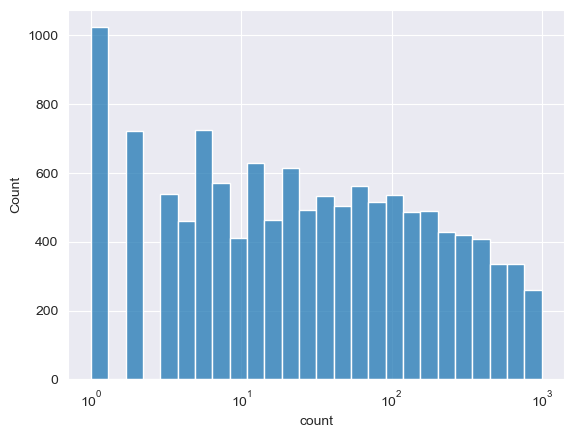

In [28]:
sns.histplot(low_acc_cities,log_scale=True)

<Axes: xlabel='count', ylabel='Count'>

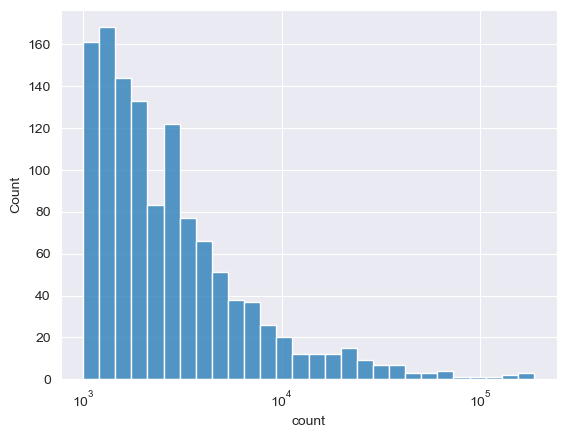

In [29]:
sns.histplot(high_acc_cities,log_scale=True)

In [31]:
cities_accident[cities_accident==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [32]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [37]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601')
df.Start_Time=pd.to_datetime(df.Start_Time)

In [38]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [39]:
df.Start_Time[0].day,df.Start_Time[0].month,df.Start_Time[0].year,df.Start_Time[0].hour,df.Start_Time[0].minute,df.Start_Time[0].second

(8, 2, 2016, 5, 46, 0)

In [40]:
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int32

<Axes: xlabel='Start_Time', ylabel='Count'>

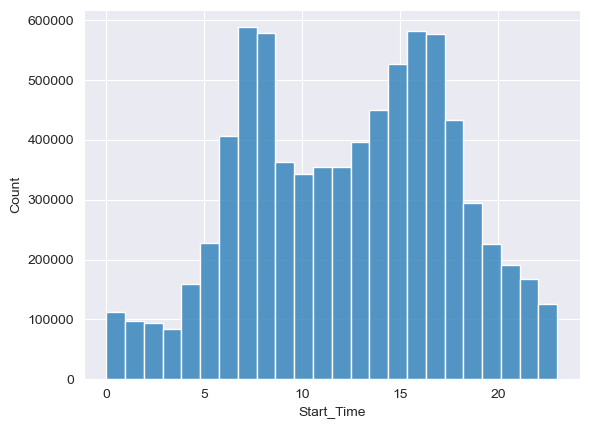

In [41]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

<Axes: xlabel='Start_Time', ylabel='Density'>

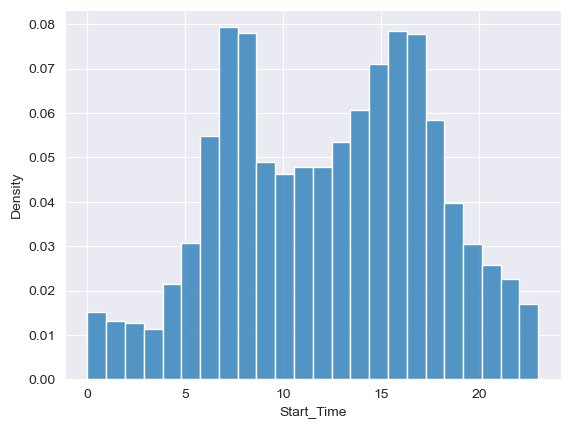

In [42]:
sns.histplot(df.Start_Time.dt.hour,bins=24,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

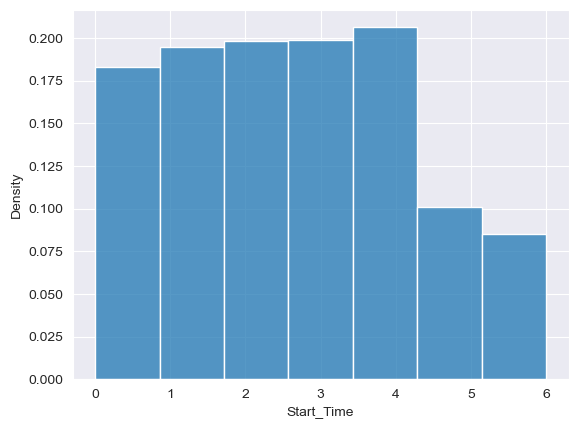

In [43]:
sns.histplot(df.Start_Time.dt.dayofweek,bins=7,stat='density')

In [44]:
sundays_starttime=df.Start_Time[df.Start_Time.dt.dayofweek==6]

<Axes: xlabel='Start_Time', ylabel='Density'>

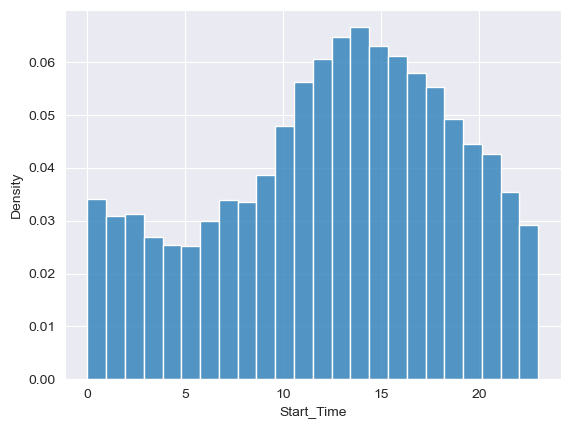

In [45]:
sns.histplot(sundays_starttime.dt.hour,bins=24,stat='density')

In [46]:
saturdays_starttime=df.Start_Time[df.Start_Time.dt.dayofweek==5]

<Axes: xlabel='Start_Time', ylabel='Density'>

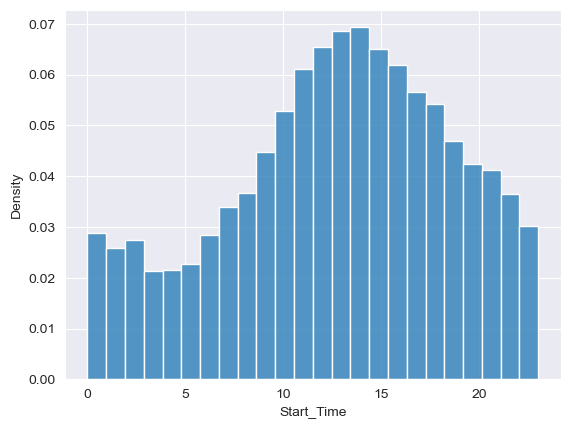

In [47]:
sns.histplot(saturdays_starttime.dt.hour,bins=24,stat='density')

In [48]:
mondays_starttime=df.Start_Time[df.Start_Time.dt.dayofweek==0]

<Axes: xlabel='Start_Time', ylabel='Density'>

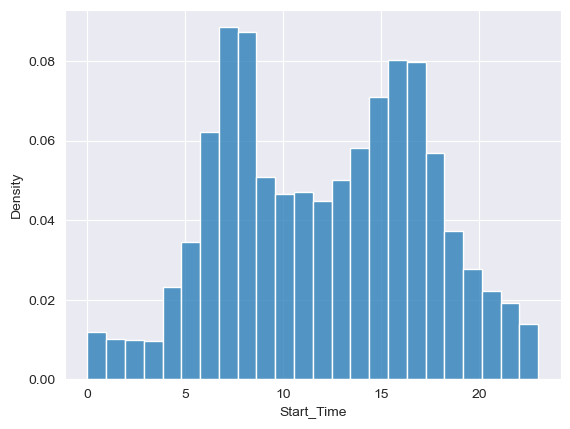

In [49]:
sns.histplot(mondays_starttime.dt.hour,bins=24,stat='density')

In [50]:
wednesdays_starttime=df.Start_Time[df.Start_Time.dt.dayofweek==2]

<Axes: xlabel='Start_Time', ylabel='Density'>

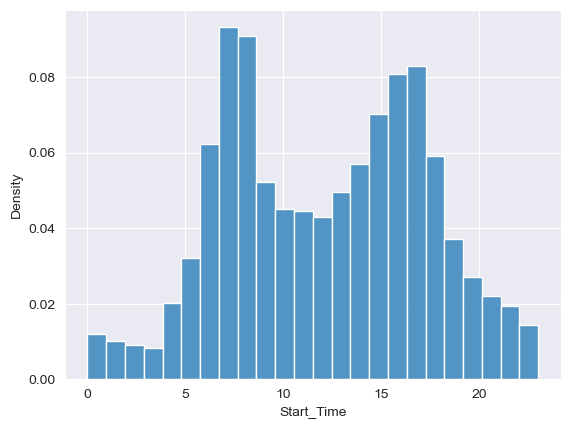

In [51]:
sns.histplot(wednesdays_starttime.dt.hour,bins=24,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

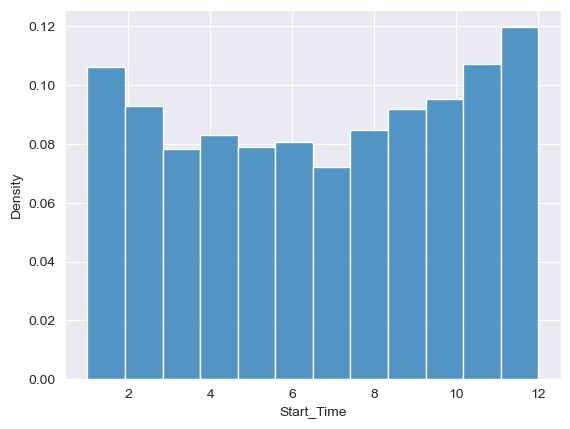

In [52]:
sns.histplot(df.Start_Time.dt.month,bins=12,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

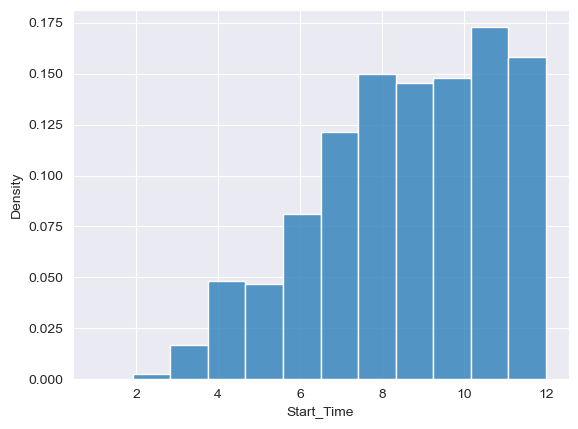

In [53]:
df_year=df[df.Start_Time.dt.year==2016]
sns.histplot(df_year.Start_Time.dt.month,bins=12,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

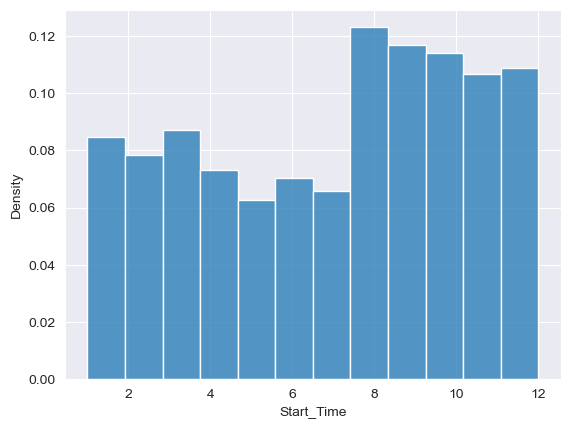

In [54]:
df_year=df[df.Start_Time.dt.year==2017]
sns.histplot(df_year.Start_Time.dt.month,bins=12,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

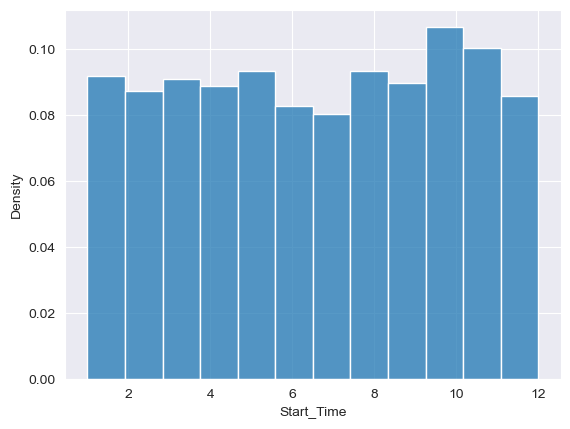

In [55]:
df_year=df[df.Start_Time.dt.year==2018]
sns.histplot(df_year.Start_Time.dt.month,bins=12,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

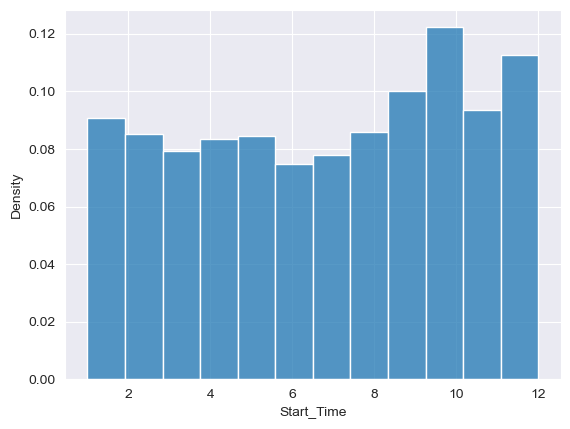

In [56]:
df_year=df[df.Start_Time.dt.year==2019]
sns.histplot(df_year.Start_Time.dt.month,bins=12,stat='density')

<Axes: xlabel='Start_Time', ylabel='Density'>

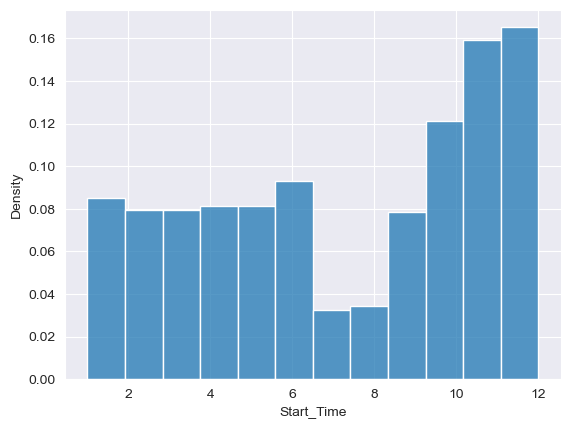

In [57]:
df_year=df[df.Start_Time.dt.year==2020]
sns.histplot(df_year.Start_Time.dt.month,bins=12,stat='density')

In [58]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [59]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

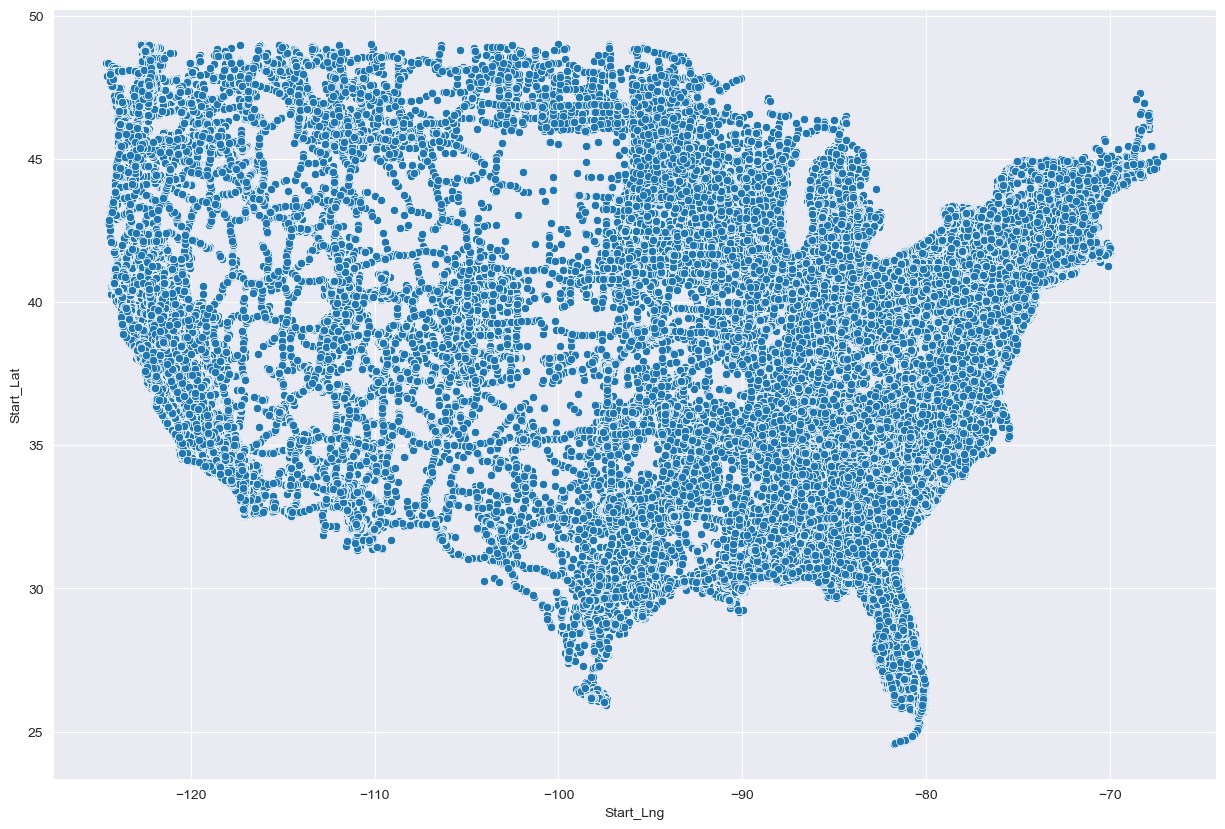

In [60]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat,x=df.Start_Lng)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

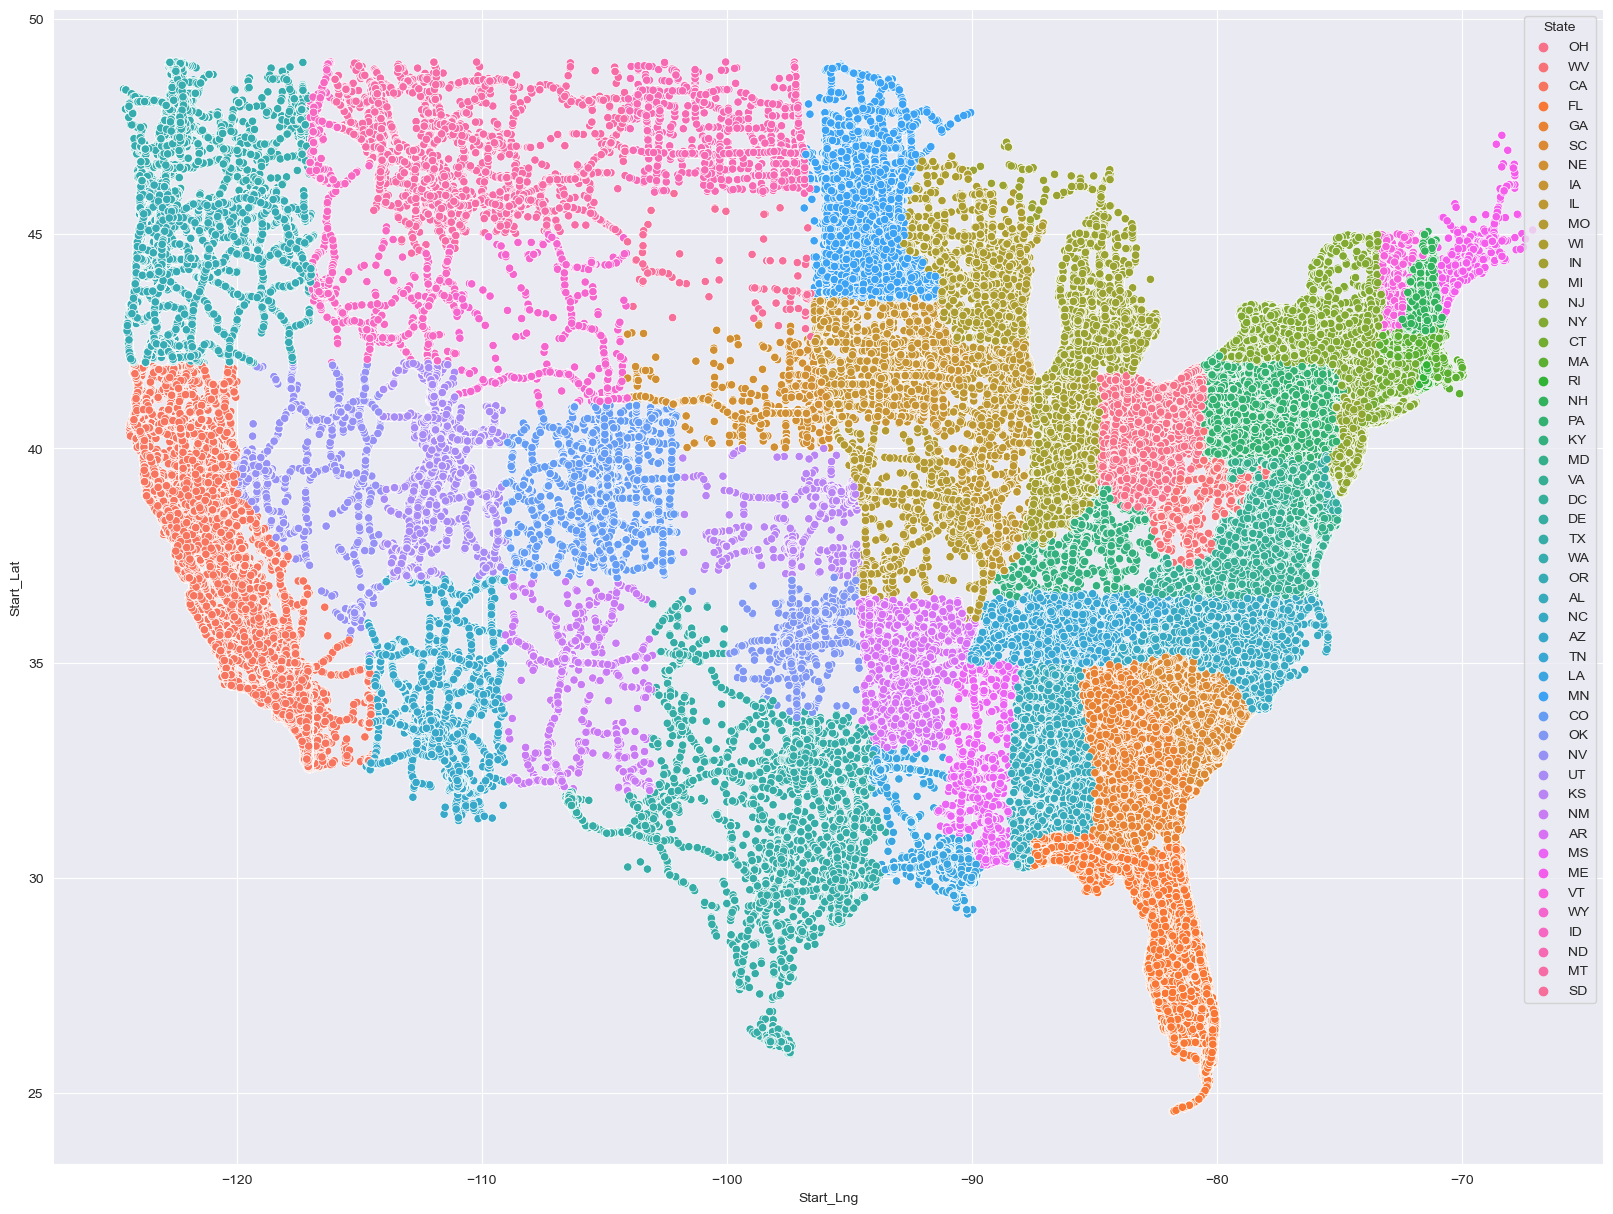

In [62]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat,x=df.Start_Lng,hue=df.State)

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

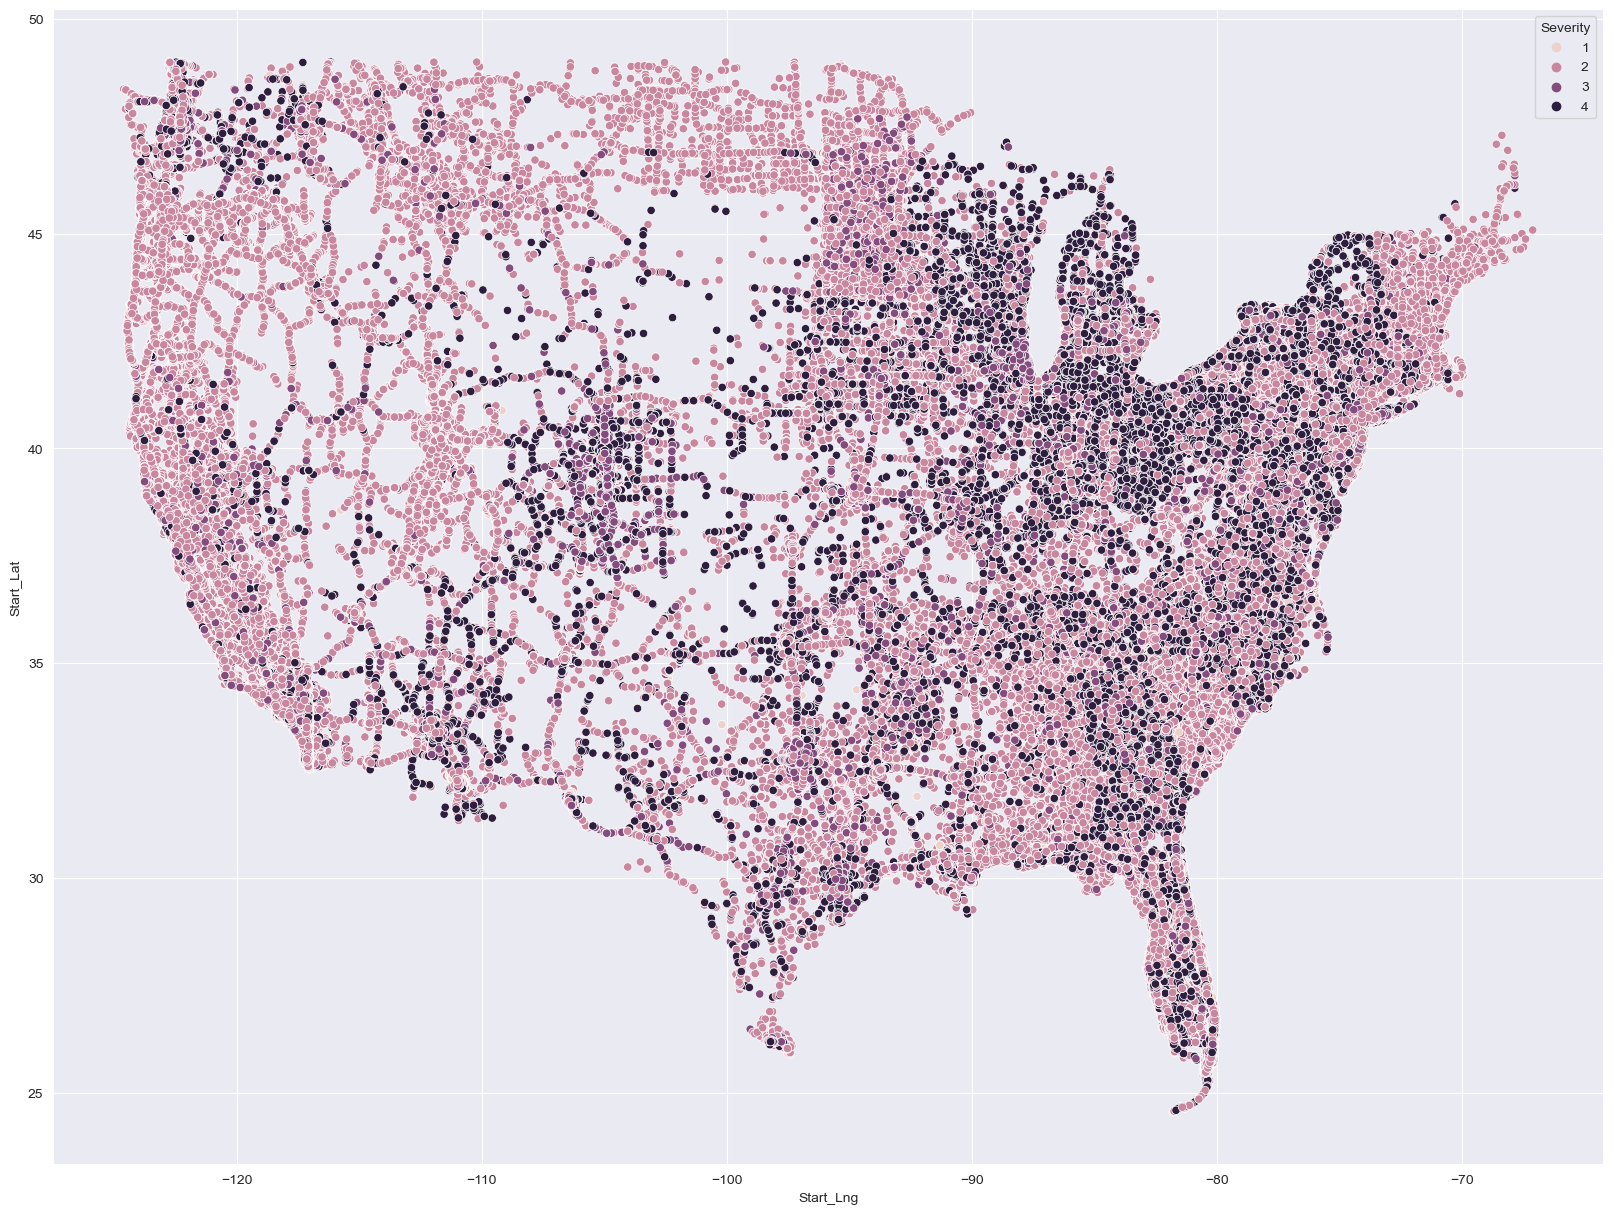

In [63]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat,x=df.Start_Lng,hue=df.Severity)

In [64]:
df.State.value_counts()[:25]

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
Name: count, dtype: int64

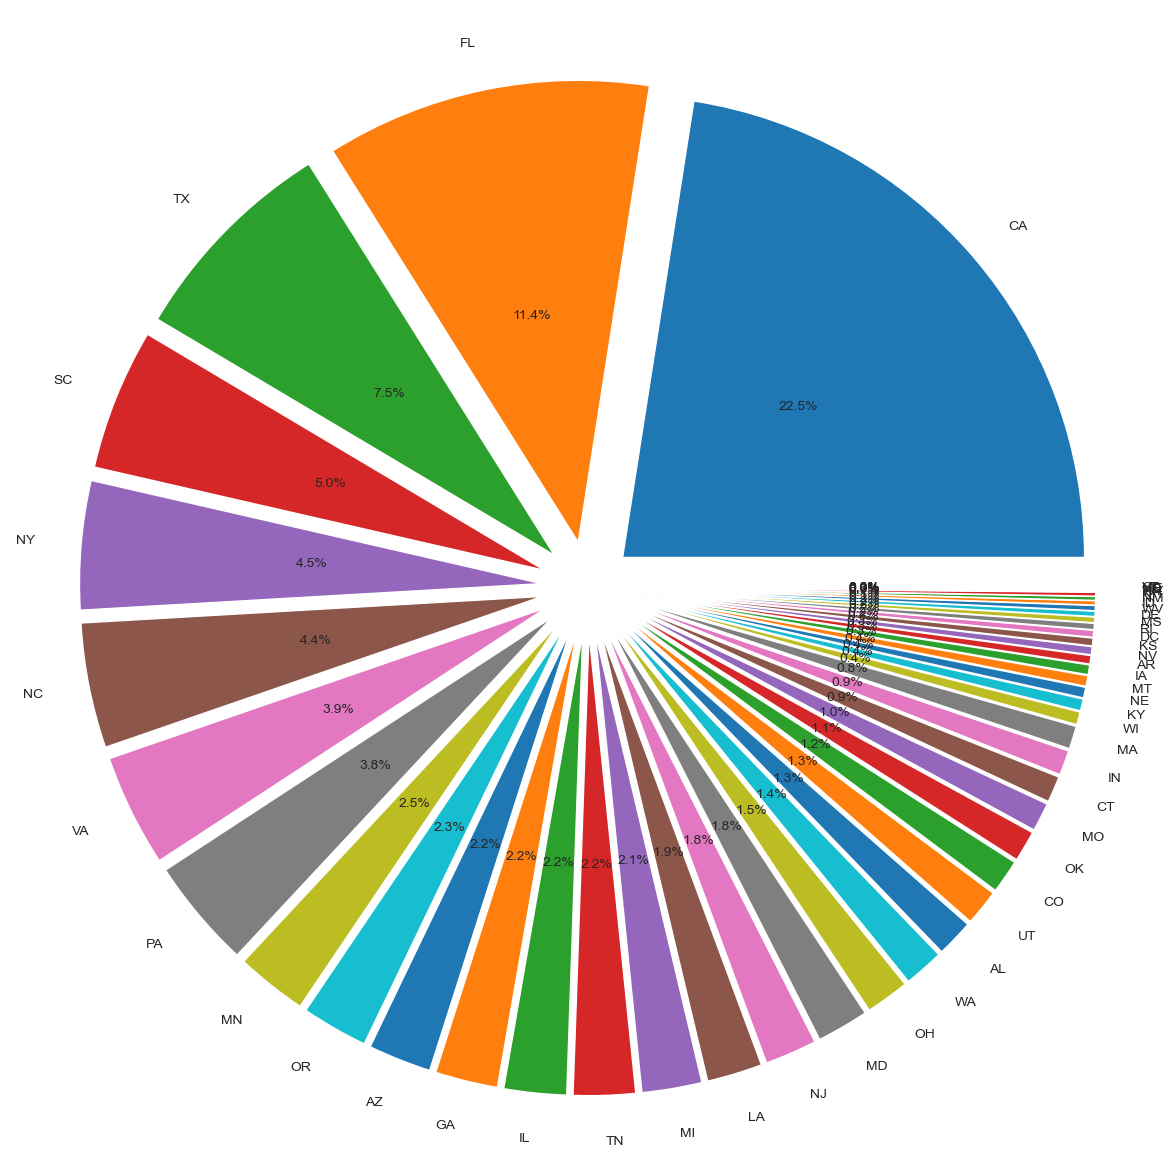

In [68]:
pie,ax=plt.subplots(figsize=[15,15])
labels=df.State.value_counts().keys()
plt.pie(x=df.State.value_counts(),autopct="%.1f%%",explode=[0.1]*len(df.State.value_counts()),labels=labels,pctdistance=0.5)
plt.show()

In [69]:
severe_accidents_4=df[df.Severity==4].State.value_counts()
severe_accidents_3=df[df.Severity==3].State.value_counts()
severe_accidents_2=df[df.Severity==2].State.value_counts()
severe_accidents_1=df[df.Severity==1].State.value_counts()

Text(0.5, 1.0, 'least severe accidents:severity=4')

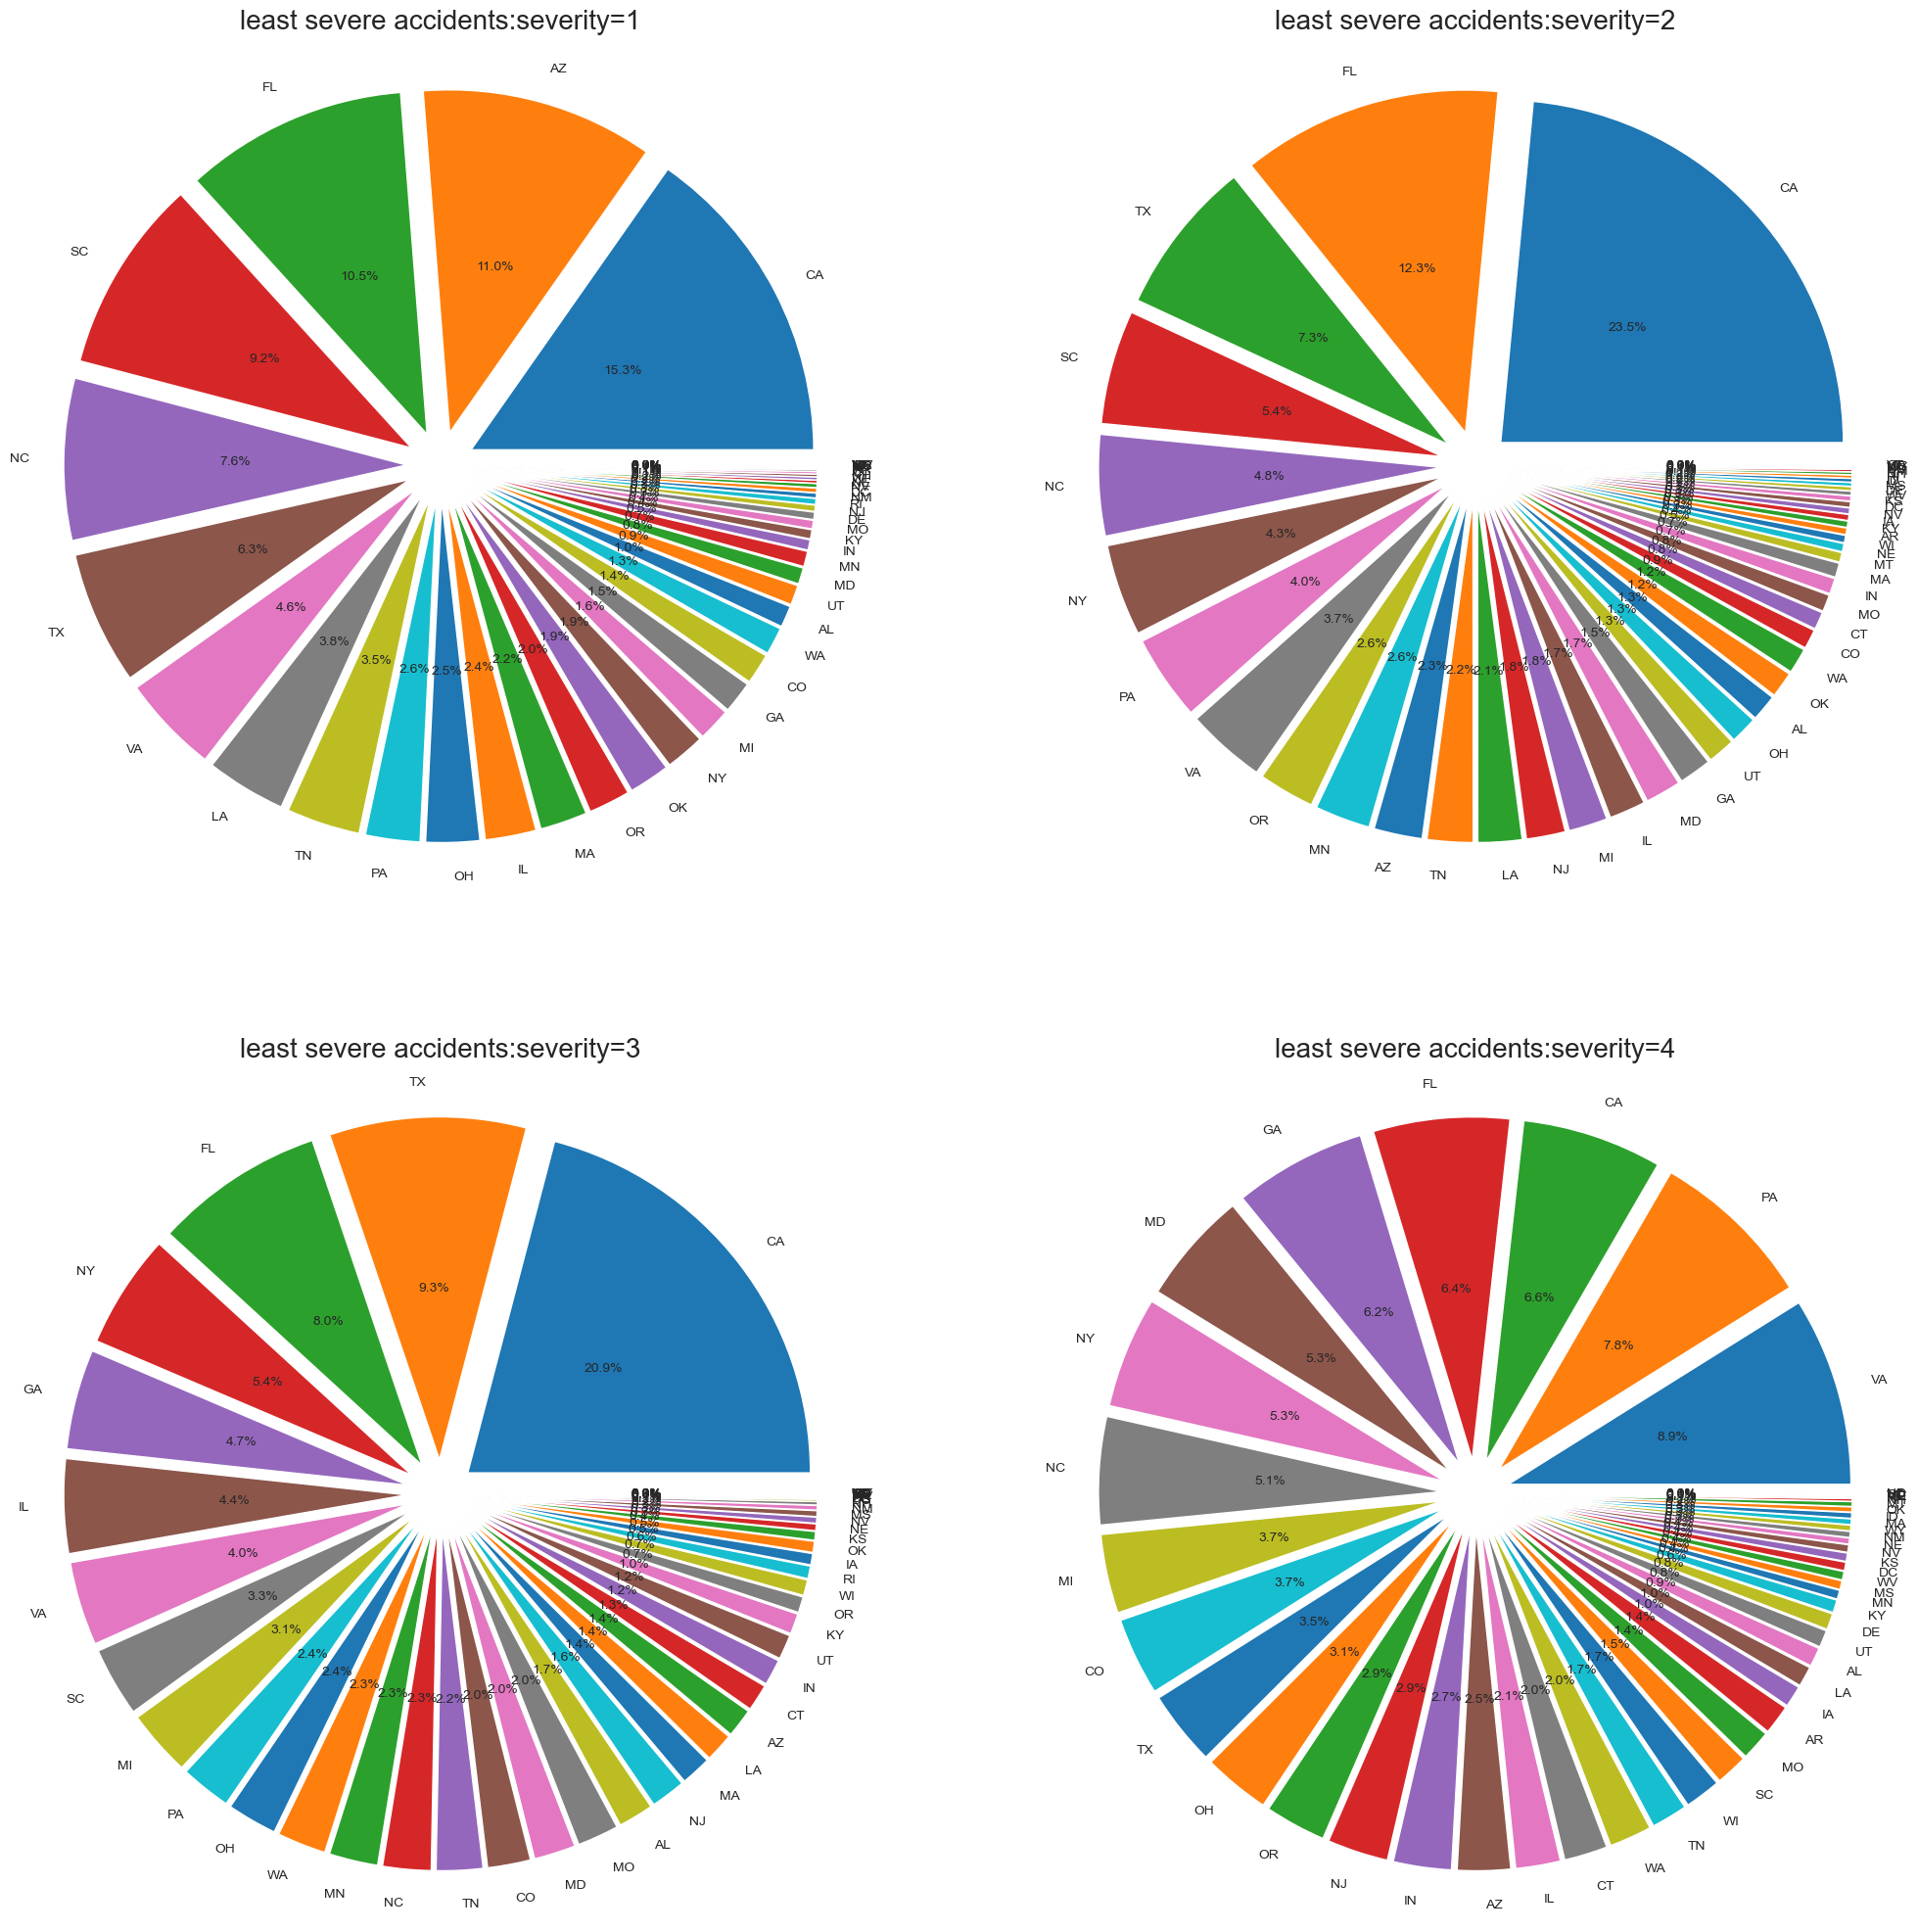

In [76]:
fig,ax1=plt.subplots(figsize=[25,25])
ax1=plt.subplot2grid((2,2),(0,0))
labels=severe_accidents_1.keys()
plt.pie(x=severe_accidents_1,autopct="%.1f%%",explode=[0.1]*len(severe_accidents_1),labels=labels,pctdistance=0.5)
plt.title("least severe accidents:severity=1",fontsize=20)

ax1=plt.subplot2grid((2,2),(0,1))
labels=severe_accidents_2.keys()
plt.pie(x=severe_accidents_2,autopct="%.1f%%",explode=[0.1]*len(severe_accidents_2),labels=labels,pctdistance=0.5)
plt.title("least severe accidents:severity=2",fontsize=20)

ax1=plt.subplot2grid((2,2),(1,0))
labels=severe_accidents_3.keys()
plt.pie(x=severe_accidents_3,autopct="%.1f%%",explode=[0.1]*len(severe_accidents_3),labels=labels,pctdistance=0.5)
plt.title("least severe accidents:severity=3",fontsize=20)

ax1=plt.subplot2grid((2,2),(1,1))
labels=severe_accidents_4.keys()
plt.pie(x=severe_accidents_4,autopct="%.1f%%",explode=[0.1]*len(severe_accidents_4),labels=labels,pctdistance=0.5)
plt.title("least severe accidents:severity=4",fontsize=20)


In [77]:
list(zip(list(df.Start_Lat),list(df.Start_Lng)))

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [78]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [79]:
df['Visibility(mi)']

0          10.0
1          10.0
2          10.0
3           9.0
4           6.0
           ... 
7728389    10.0
7728390    10.0
7728391    10.0
7728392    10.0
7728393     7.0
Name: Visibility(mi), Length: 7728394, dtype: float64

In [80]:
df['Visibility(mi)'].value_counts()

Visibility(mi)
10.0     6070231
7.0       217027
9.0       188529
8.0       149975
5.0       144153
          ...   
78.0           1
101.0          1
72.0           1
67.0           1
43.0           1
Name: count, Length: 92, dtype: int64

In [81]:
df[(df.Severity==4) & (df['Visibility(mi)']<=10)]

ID   Source  Severity          Start_Time  \
619          A-620  Source2         4 2016-03-11 13:18:48   
1197        A-1198  Source2         4 2016-06-24 22:28:49   
1901        A-1902  Source2         4 2016-07-01 14:09:13   
4143        A-4144  Source2         4 2016-07-25 14:23:33   
4964        A-4965  Source2         4 2016-08-01 07:44:37   
...            ...      ...       ...                 ...   
7728354  A-7777722  Source1         4 2019-08-23 17:25:12   
7728355  A-7777723  Source1         4 2019-08-23 17:25:12   
7728366  A-7777734  Source1         4 2019-08-23 13:39:48   
7728367  A-7777735  Source1         4 2019-08-23 13:39:48   
7728380  A-7777748  Source1         4 2019-08-23 16:51:29   

                    End_Time  Start_Lat   Start_Lng   End_Lat     End_Lng  \
619      2016-03-11 13:48:48  39.917412  -83.014236       NaN         NaN   
1197     2016-06-24 22:58:49  37.321117 -121.899887       NaN         NaN   
1901     2016-07-01 14:39:13  37.630623 -122.435043       NaN         NaN   
4143     2016-07-25 15:11:13  37.339115 -121.851807       NaN         NaN   
4964     2016-08-01 08:29:37  37.710648 -122.166687       NaN         NaN   
...                      ...        ...         ...       ...         ...   
7728354  2019-08-23 17:54:00  38.995930 -121.672020  39.00317 -121.662679   
7728355  2019-08-23 17:54:00  39.003170 -121.662679  38.99593 -121.672020   
7728366  2019-08-23 14:05:33  33.685990 -117.886260  33.68537 -117.885720   
7728367  2019-08-23 14:05:33  33.687300 -117.890190  33.68599 -117.886260   
7728380  2019-08-23 17:21:02  33.779130 -117.887980  33.77991 -117.890860   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
619             0.010  ...      False   False  False           False   
1197            0.000  ...      False   False  False           False   
1901            0.000  ...      False   False  False           False   
4143            0.000  ...      False   False  False           False   
4964            0.000  ...      False   False  False           False   
...               ...  ...        ...     ...    ...             ...   
7728354         0.708  ...      False   False  False           False   
7728355         0.708  ...      False   False  False           False   
7728366         0.053  ...      False   False  False           False   
7728367         0.243  ...      False   False  False           False   
7728380         0.174  ...      False   False  False           False   

        Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
619              False        False            Day            Day   
1197             False        False          Night          Night   
1901             False        False            Day            Day   
4143             False        False            Day            Day   
4964             False        False            Day            Day   
...                ...          ...            ...            ...   
7728354          False        False            Day            Day   
7728355          False        False            Day            Day   
7728366          False        False            Day            Day   
7728367          False        False            Day            Day   
7728380          False        False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  
619                   Day                   Day  
1197                Night                 Night  
1901                  Day                   Day  
4143                  Day                   Day  
4964                  Day                   Day  
...                   ...                   ...  
7728354               Day                   Day  
7728355               Day                   Day  
7728366               Day                   Day  
7728367               Day                   Day  
7728380               Day                   Day  

[196205 rows x 46 columns]

In [83]:
(len(df[df['Visibility(mi)']<=2])/len(df))*100

4.760109280142808

In [84]:
(len(df[(df['Visibility(mi)']<=2) & (df['Severity']==4)])/len(df))*100

0.1428627991792344

In [86]:
weather=df.Weather_Condition.value_counts()

In [87]:
weather[weather>1000]

Weather_Condition
Fair                            2560802
Mostly Cloudy                   1016195
Cloudy                           817082
Clear                            808743
Partly Cloudy                    698972
Overcast                         382866
Light Rain                       352957
Scattered Clouds                 204829
Light Snow                       128680
Fog                               99238
Rain                              84331
Haze                              76223
Fair / Windy                      35671
Heavy Rain                        32309
Light Drizzle                     22684
Thunder in the Vicinity           17611
Cloudy / Windy                    17035
T-Storm                           16810
Mostly Cloudy / Windy             16508
Snow                              15537
Thunder                           14202
Light Rain with Thunder           13597
Smoke                             12668
Wintry Mix                        11703
Partly Cloudy / Windy 

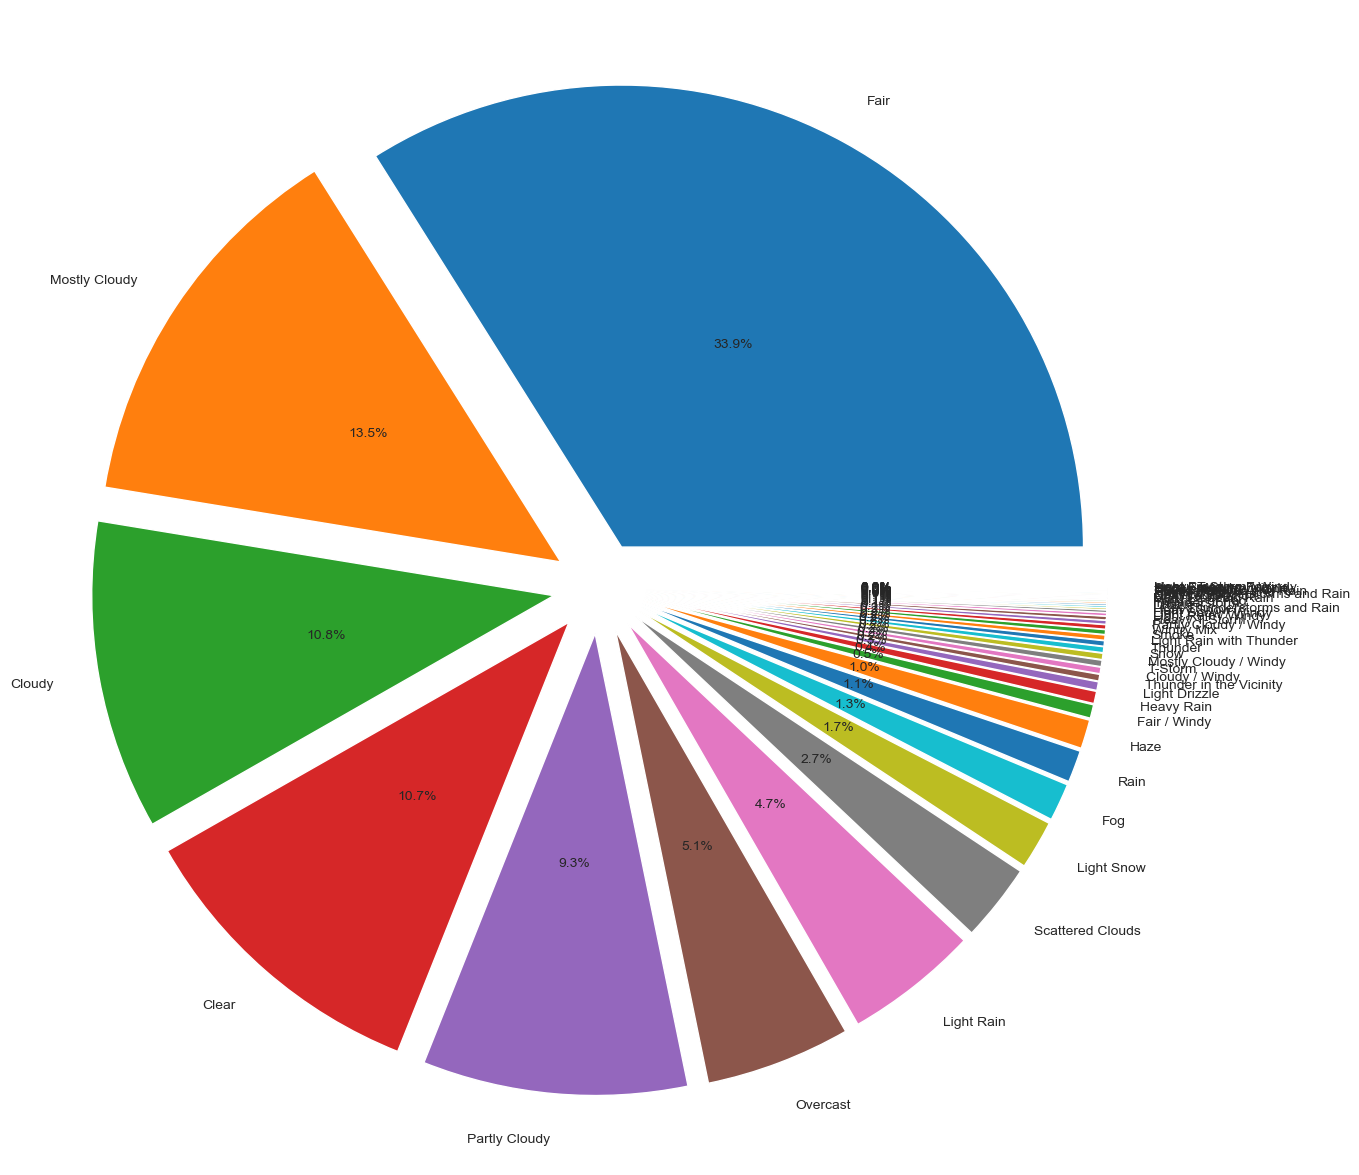

In [89]:
pie,ax=plt.subplots(figsize=[15,15])
labels=weather[weather>1000].keys()
plt.pie(x=weather[weather>1000],autopct="%.1f%%",explode=[0.1]*len(weather[weather>1000]),labels=labels,pctdistance=0.5)
plt.show()

In [91]:
temperature=df['Temperature(F)'].value_counts()

In [92]:
temperature.index

Index([ 77.0,  73.0,  68.0,  72.0,  75.0,  70.0,  63.0,  59.0,  64.0,  79.0,
       ...
       113.4, 108.7, -32.8, -16.2, -13.2,   1.6, -21.5, 127.0, 158.0, 132.6],
      dtype='float64', name='Temperature(F)', length=860)

In [93]:
temperature.values

array([170991, 170898, 163767, 160498, 158448, 155568, 149787, 149017,
       148466, 147140, 144854, 140366, 134818, 132517, 132335, 129882,
       126838, 125909, 116664, 105573, 101392, 100146,  99828,  99380,
        95131,  95006,  94044,  93998,  92772,  90551,  88678,  88196,
        83239,  82609,  81313,  80997,  80877,  79400,  76945,  74755,
        73827,  72796,  67168,  66892,  66673,  63754,  63191,  62154,
        61907,  61152,  59488,  53974,  53605,  52905,  50464,  46184,
        44781,  43555,  41912,  37787,  37591,  36699,  35306,  34490,
        34079,  33764,  33145,  32887,  32703,  32666,  32069,  31882,
        31414,  31115,  30261,  29707,  29102,  28983,  25846,  25494,
        25174,  24592,  24228,  23428,  23165,  21019,  20620,  20101,
        19046,  18683,  18460,  18184,  18062,  17763,  17105,  17020,
        16598,  16350,  16115,  16106,  15360,  15359,  15252,  15075,
        14912,  14719,  14677,  14585,  14514,  14279,  14039,  13846,
      

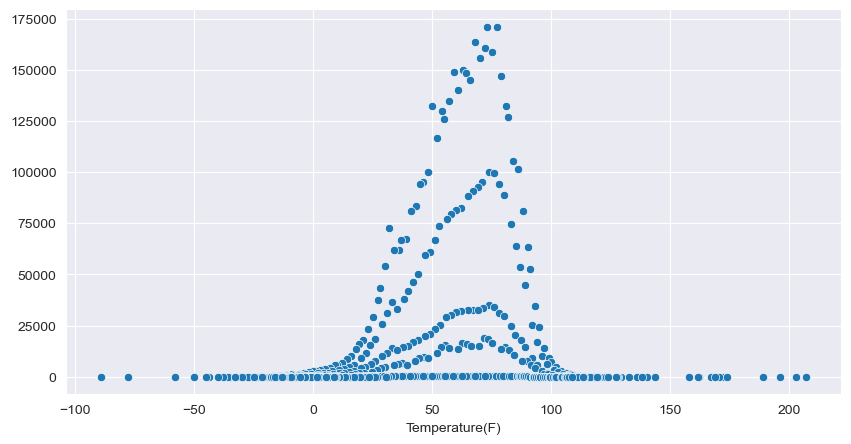

In [94]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=temperature.index,y=temperature.values)
plt.show()

In [95]:
df.Sunrise_Sunset.value_counts()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

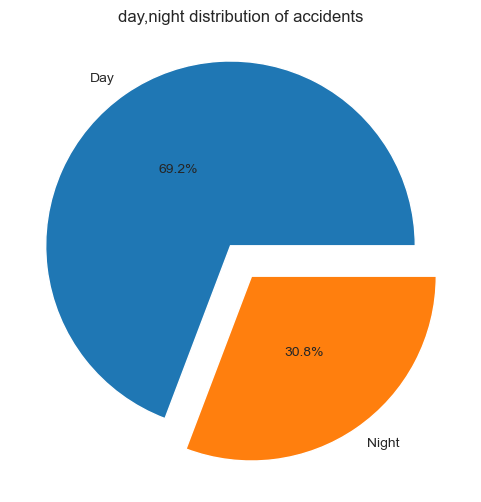

In [96]:
fig,ax=plt.subplots(figsize=[6,6])
labels=df.Sunrise_Sunset.value_counts().keys()
plt.pie(x=df.Sunrise_Sunset.value_counts(),autopct="%.1f%%",explode=[0.1]*len(df.Sunrise_Sunset.value_counts()),labels=labels,pctdistance=0.5)
plt.title("day,night distribution of accidents")
plt.show()

In [97]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [99]:
amenity=df.Amenity.groupby(df.Severity).value_counts()
amenity

Severity  Amenity
1         False        65987
          True          1379
2         False      6068089
          True         88892
3         False      1295307
          True          4030
4         False       202677
          True          2033
Name: count, dtype: int64

In [100]:
amenity.index

MultiIndex([(1, False),
            (1,  True),
            (2, False),
            (2,  True),
            (3, False),
            (3,  True),
            (4, False),
            (4,  True)],
           names=['Severity', 'Amenity'])

In [103]:
no_exit=df.No_Exit.groupby(df.Severity).value_counts()
no_exit

Severity  No_Exit
1         False        66985
          True           381
2         False      6140021
          True         16960
3         False      1297502
          True          1835
4         False       204341
          True           369
Name: count, dtype: int64

In [104]:
railway=df.Railway.groupby(df.Severity).value_counts()
railway

Severity  Railway
1         False        66302
          True          1064
2         False      6101200
          True         55781
3         False      1290760
          True          8577
4         False       203153
          True          1557
Name: count, dtype: int64

In [105]:
traffic_calming=df.Traffic_Calming.groupby(df.Severity).value_counts()
traffic_calming

Severity  Traffic_Calming
1         False                67280
          True                    86
2         False              6150420
          True                  6561
3         False              1298485
          True                   852
4         False               204611
          True                    99
Name: count, dtype: int64

In [106]:
stop=df.Stop.groupby(df.Severity).value_counts()
stop

Severity  Stop 
1         False      64723
          True        2643
2         False    5958591
          True      198390
3         False    1291686
          True        7651
4         False     199023
          True        5687
Name: count, dtype: int64

In [107]:
traffic_signal=df.Traffic_Signal.groupby(df.Severity).value_counts()
traffic_signal

Severity  Traffic_Signal
1         False               41025
          True                26341
2         False             5148309
          True              1008672
3         False             1210728
          True                88609
4         False              184560
          True                20150
Name: count, dtype: int64

In [108]:
give_way=df.Give_Way.groupby(df.Severity).value_counts()
give_way

Severity  Give_Way
1         False         66817
          True            549
2         False       6126858
          True          30123
3         False       1294598
          True           4739
4         False        203539
          True           1171
Name: count, dtype: int64

In [109]:
bump=df.Bump.groupby(df.Severity).value_counts()
bump

Severity  Bump 
1         False      67332
          True          34
2         False    6153837
          True        3144
3         False    1299031
          True         306
4         False     204680
          True          30
Name: count, dtype: int64

In [112]:
df.Turning_Loop.value_counts()

Turning_Loop
False    7728394
Name: count, dtype: int64

In [114]:
#null_cols=[i for i in data.columns if data[i].isnull().any()]